# Practice Exercise Linear Regression
Welcome to the practice exercise on Linear Regression. We strongly recommend you try out all the questions/steps mentioned here and refer to the solution notebook later.

## Case Study: Boston Housing Price Prediction

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.


**Importing Libraries**

In [109]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

### <a id = "link1">Load the dataset</a>

In [110]:
!head Boston.csv

In [111]:
df = pd.read_csv('Boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [112]:
df.shape

(506, 13)

**Get the info data types column wise**

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [114]:
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
LSTAT      False
MEDV       False
dtype: bool

**Get summary statistics around the numerical columns**

In [115]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [116]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
LSTAT      0.906460
MEDV       1.108098
dtype: float64

### Univariate and Bivariate Analysis
Plot the distplots for the features and then plot scatterplots for features and the target variable 

To do - Identify insights if any from the distributuions.

<AxesSubplot:xlabel='CRIM'>

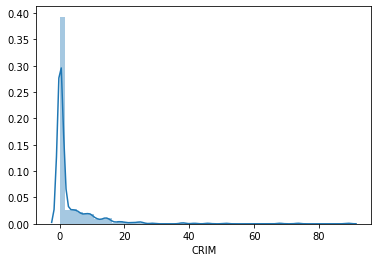

In [117]:
sns.distplot(df['CRIM'])

<AxesSubplot:xlabel='RM'>

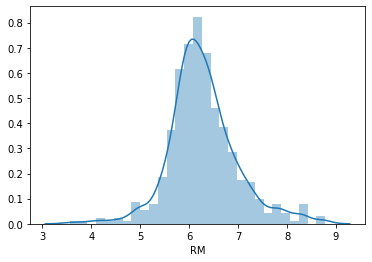

In [118]:
sns.distplot(df['RM'])

<AxesSubplot:xlabel='CHAS'>

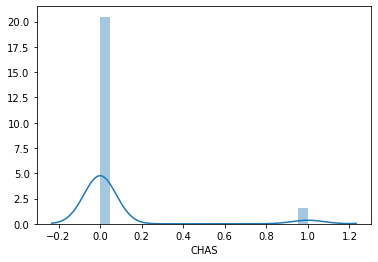

In [119]:
sns.distplot(df['CHAS'])

In [120]:
#sns.pairplot(df)

**Get the Correlation Heatmap**

<AxesSubplot:>

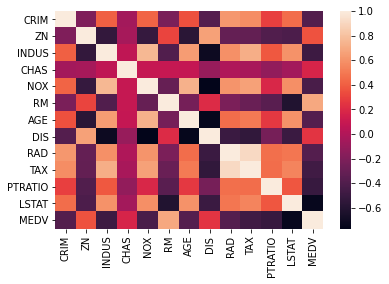

In [121]:
sns.heatmap(df.corr())

In [122]:
# Let us create a new feature using the TAX and RAD.
df['Rad/Tax'] = df['RAD']/df['TAX']

### <a id = "link2">Split the dataset</a>
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [123]:
dep_df = df[['MEDV']]
dep_df.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [124]:
indep_df=df.drop('MEDV',axis=1)
indep_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Rad/Tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0.003378
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0.008264
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,0.008264
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,0.013514
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,0.013514


In [125]:
indep_df['Rad/Tax'] = indep_df['RAD']/indep_df['TAX']
indep_df['RM*20'] = indep_df['RM'] * -20
indep_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Rad/Tax,RM*20
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0.003378,-131.50
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0.008264,-128.42
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,0.008264,-143.70
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,0.013514,-139.96
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,0.013514,-142.94


In [126]:
X = indep_df
y = dep_df

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### <a id = "link3">Using Linear Model from Scikit learn library</a>

**Fit the model to the training set**

In [128]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Get the score on training set**

In [129]:
regression_model.score(X_train, y_train)

0.7077132931309867

**Write your own function for the r-squared score**

In [130]:
def get_predicted_value( model, X):
    return  model.predict(X)

In [131]:
y_predict = get_predicted_value(regression_model,X_train)

In [132]:
np.var(y_train).values

array([81.18906325])

In [133]:
1 - ((y_predict - y_train.values)**2 ).sum() / ((y_train.values - y_train.values.mean())**2).sum()

0.7077132931309869

**Get the score on test set**

In [134]:
regression_model.score(X_test, y_test)

0.7747487100790014

**Get the RMSE on test set**

In [135]:
y_predicted_test = get_predicted_value(regression_model,X_test)

In [136]:
np.sqrt(((y_test.values - y_predicted_test)**2).sum()/len(y_test))

4.5437089967039155

**Get model Coefficients**

In [137]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for CRIM is -0.11164557348700717
The coefficient for ZN is 0.0636226029154532
The coefficient for INDUS is 0.05816017806553382
The coefficient for CHAS is 2.4812645928411405
The coefficient for NOX is -22.288444928096638
The coefficient for RM is 0.006745750546527223
The coefficient for AGE is 0.004333206124680092
The coefficient for DIS is -1.5538441948939121
The coefficient for RAD is 0.1635731487558008
The coefficient for TAX is -0.008756354173498473
The coefficient for PTRATIO is -0.9766725794264225
The coefficient for LSTAT is -0.5846333698546059
The coefficient for Rad/Tax is 72.9228725682045
The coefficient for RM*20 is -0.13491501094007402


**Automate the equation of the fit**

In [ ]:
# This should be the function get_predicted_value

## <a id = "link4">Bonus: Using Statsmodels OLS</a>

In [78]:
import statsmodels.api as sm


**Make the linear model using OLS**

In [82]:
X_endog = sm.add_constant(X_train)
res = sm.OLS(y_train, X_endog)

In [83]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     63.33
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.66e-82
Time:                        11:21:57   Log-Likelihood:                -1062.8
No. Observations:                 354   AIC:                             2154.
Df Residuals:                     340   BIC:                             2208.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3960      6.555      7.383      0.000      35.502      61.290
CRIM          -0.1116      0.043     -2.585      0.010      -0.197      -0.027
ZN             0.0636      0.019      3.344      0.001       0.026       0.101
INDUS          0.0582      0.077      0.751      0.453      -0.094       0.210
CHAS           2.4813      0.986      2.517      0.012       0.542       4.421
NOX          -22.2884      4.700     -4.742      0.000     -31.534     -13.043
RM             2.7050      0.521      5.191      0.000       1.680       3.730
AGE            0.0043      0.017      0.261      0.795      -0.028       0.037
DIS           -1.5538      0.260     -5.972      0.000      -2.066      -1.042
RAD            0.1636      0.232      0.705      0.481      -0.293       0.620
TAX           -0.0088      0.007     -1.344      0.180      -0.022       0.004
PTRATIO       -0.9767      0.173     -5.650      0.000      -1.317      -0.637
LSTAT         -0.5846      0.062     -9.500      0.000      -0.706      -0.464
Rad/Tax       72.9229    115.940      0.629      0.530    -155.127     300.973
==============================================================================
Omnibus:                      135.944   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.381
Skew:                           1.641   Prob(JB):                    1.53e-121
Kurtosis:                       8.191   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Get the value of coefficient of determination**

In [85]:
print('The variation in the independent variable which is explained by the dependent variable is','\n',
      res.rsquared*100,'%')

AttributeError: 'OLS' object has no attribute 'rsquared'

**Get the Predictions on test set**

**Calculate MSE for training set**

**Get the RMSE on training set**

**Get the RMSE on test set**